## Vector data - subsampling

This section explores subsampling (also known as thinning) of vector data. Subsampling reduces the number of points plotted, which is especially useful when visualising vector fields such as wind. It helps prevent overcrowding of arrows or flags and ensures consistent visual density across different projections.

### Example: Wind from Storm Ophelia (October 2017)

In this example, we will use sample wind data from Storm Ophelia, which impacted the UK in October 2017.

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "storm_ophelia_wind_850.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20171016,0,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


### Subsampling with `Subsample`

To subsample our vector points, we can use the `Subsample` class from `earthkit.plots.resample`.

#### Subsample Modes

Subsample offers two modes:
- `stride`: Selects points based on a regular step (stride) in x and y.
- `fixed`: Selects a fixed number of points in x and y, distributed evenly across the plot.


#### Subsampling with `mode="stride"`

Using `mode="stride"`, you can specify the step size of your subsample. For example, striding with a value of 1 samples every grid cell. Let's plot the wind U component grid cells alongside our vector data to see how the spacing changes with different subsamples.

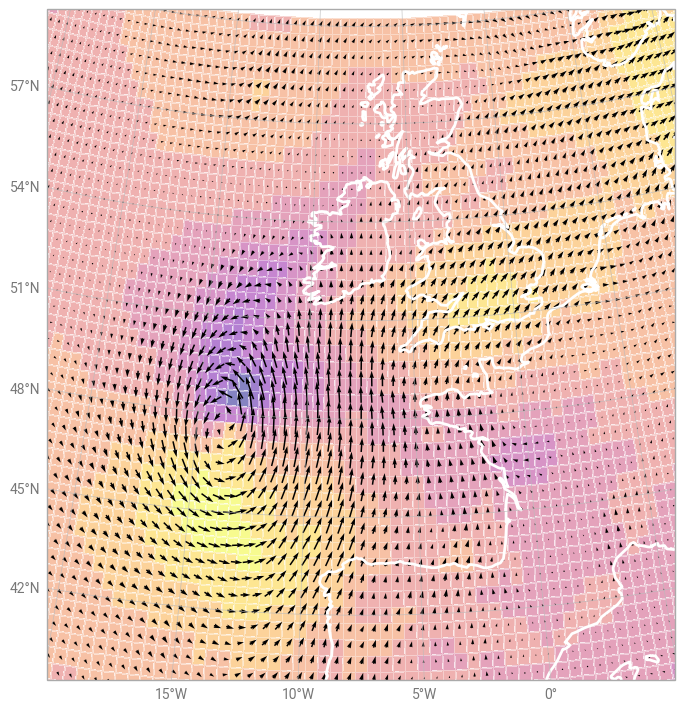

In [2]:
from earthkit.plots.resample import Subsample

# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data.sel(short_name="u"), edgecolors="white", linewidths=0.5, alpha=0.5)

# Plot wind arrows at every grid cell
chart.quiver(data, resample=Subsample(1, mode="stride"))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()

#### Different strides in x and y

You can also specify different strides for x and y with the `nx` and `ny` arguments. Let's do that now with a step of 3 in x and 2 in y - you can see that every third grid cell in the x direction is sampled, and every second grid cell in y.

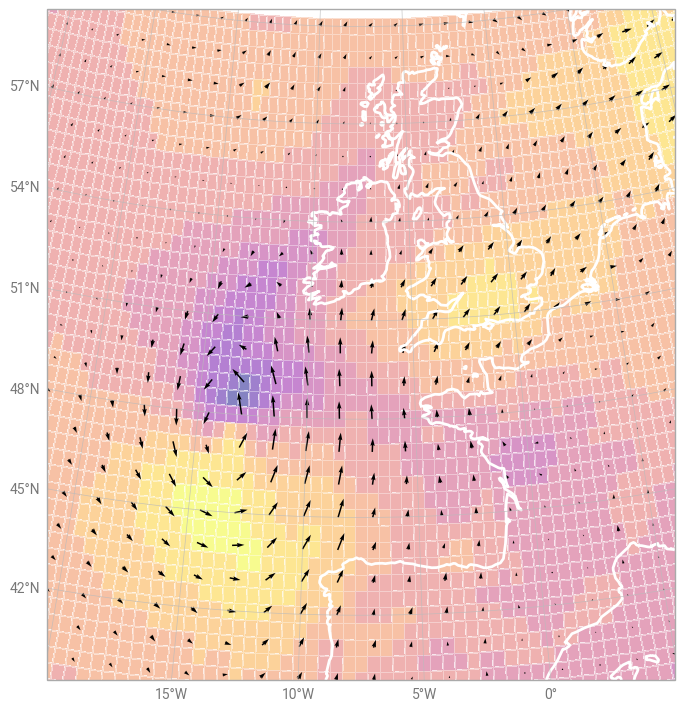

In [3]:
# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data.sel(short_name="u"), edgecolors="white", linewidths=0.5, alpha=0.5)

# Plot wind arrows at every third x point and every second y point
chart.quiver(data, resample=Subsample(nx=3, ny=2, mode="stride"))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()

#### Subsampling with `mode="fixed"`

In `fixed` mode, you specify the desired number of points in x (`nx`) and y (`ny`). The points are evenly distributed over the plot.

For example, let's resample the vector data to 20 points in x and 20 points in y:

<div class="alert alert-block alert-info">
<strong>NOTE: </strong> <code>mode="fixed"</code> provides an approximate number of points. The exact number may vary:
  <ul>
    <li>If <code>nx</code> or <code>ny</code> exceeds the dataset’s resolution, the plot will show the full resolution, and never interpolate to a higher resolution (use <code>earthkit.plots.resample.Regrid</code> for this, which is covered in the next section).</li>
    <li>The sampling is always evenly spaced, ensuring a uniform distribution. This means that if <code>nx</code> or <code>ny</code> is not a <strong>factor</strong> of the number of x or y points in your data, you will get a number of points equal to the <strong>nearest</strong> factor.</li>
  </ul> 
</div>

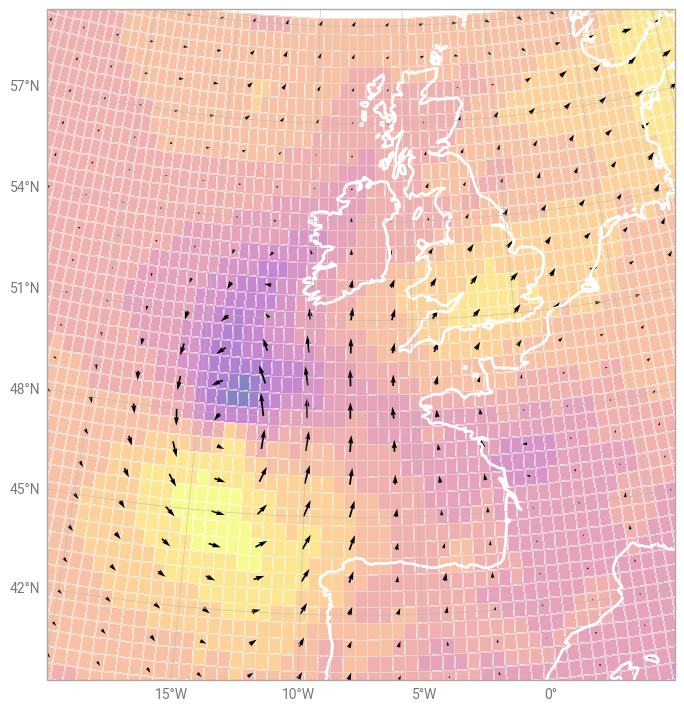

In [4]:
# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data[0], edgecolors="white", linewidths=0.5, alpha=0.5)


# Plot wind arrows with a density of 20 in x and 20 in y
chart.quiver(data, resample=Subsample(nx=20, ny=20, mode="fixed"))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()